In [1]:
from langgraph.graph import StateGraph, START, END
import json
from estado import AgentState
from estado import Nivel
from agentes_de_analisis import nodo_analizar_num_programas_instituciones
from agentes_de_analisis import nodo_analizar_matriculas_vs_estudiantes
from agentes_de_analisis import nodo_analizar_matriculas_vs_tiempo
from agentes_de_analisis import nodo_analizar_programas_por_departamento_municipio
from agentes_de_analisis import nodo_analizar_num_estudiantes_tiempo
from buscador_programas import build_query_agent


In [2]:
from lector import nodo_lector_snies  # importa tu tool
from buscador_programas import decide_iterate  
builder = StateGraph(AgentState)
# Añadir el nodo
builder.add_node("lector_snies", nodo_lector_snies)
builder.add_node("analizar_num_programas_instituciones", nodo_analizar_num_programas_instituciones)
builder.add_node("analizar_matriculas_vs_estudiantes", nodo_analizar_matriculas_vs_estudiantes)
builder.add_node("analizar_matriculas_vs_tiempo", nodo_analizar_matriculas_vs_tiempo)
builder.add_node("analizar_programas_por_departamento_municipio", nodo_analizar_programas_por_departamento_municipio)
builder.add_node("analizar_num_estudiantes_tiempo", nodo_analizar_num_estudiantes_tiempo)
builder.add_node("busqueda_web_programas", build_query_agent)

builder.add_edge(START, "lector_snies")
#builder.add_edge("lector_snies", "busqueda_web_programas")
builder.add_edge("lector_snies", "analizar_num_programas_instituciones")
builder.add_edge("analizar_num_programas_instituciones", "analizar_matriculas_vs_estudiantes")
builder.add_edge("analizar_matriculas_vs_estudiantes", "analizar_matriculas_vs_tiempo")
builder.add_edge("analizar_matriculas_vs_tiempo", "analizar_programas_por_departamento_municipio")
builder.add_edge("analizar_programas_por_departamento_municipio", "analizar_num_estudiantes_tiempo")
builder.add_edge("analizar_num_estudiantes_tiempo", END)
#builder.add_edge("analizar_num_estudiantes_tiempo", "busqueda_web_programas")
"""
builder.add_conditional_edges(
    "busqueda_web_programas",
    decide_iterate,
    {
        "iterate": "busqueda_web_programas",
        "finish": END
    }
)
"""
graph = builder.compile()


Agente: análisis de información existente de SNIES
Revisando si ya hay información:  0
Lector de Snies
Proceso de carga de los archivos de SNIES
Archivos de SNIES cargados correctamente
Programas equivalentes encontrados:  ['especializacion psicologia salud', 'especializacion salud familiar integral', 'especializacion salud ocupacional', 'especializacion salud seguridad trabajo', 'especializacion administracion salud publica', 'especializacion alimentacion nutricion promocion salud', 'especializacion educacion artistica integral', 'especializacion educacion social ambitos academicos', 'especializacion administracion educacion fisica deporte recreacion', 'especializacion administracion educacion fisica recreacion deporte', 'especializacion educacion especial enfasis comunicacion aumentativa alternativa', 'especializacion educacion especial enfasis comunicacion aumentativay alternativa', 'especializacion educacion matematica', 'especializacion ensenanza lenguas extranjeras educacion bas

c:\Users\000010478\Downloads\agentes_programas\notebooks\lector.py:375: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



Agente: análisis número de programas e instituciones en el tiempo
Se debe correr el análisis en el LLM

Agente: Análisis de la dispersión de matrículas respecto a los estudiantes
Se cargó la información consultando al LLM

Agente: análisis del valor de la matrícula en el tiempo para los programas
Se cargó el análisis desde el LLM

Agente: análisis de número de programas por departamento y municipio
Se consulta al LLM

Agente: análisis de número de estudiantes en el tiempo en los programas
El análisis se procesa desde el LLM


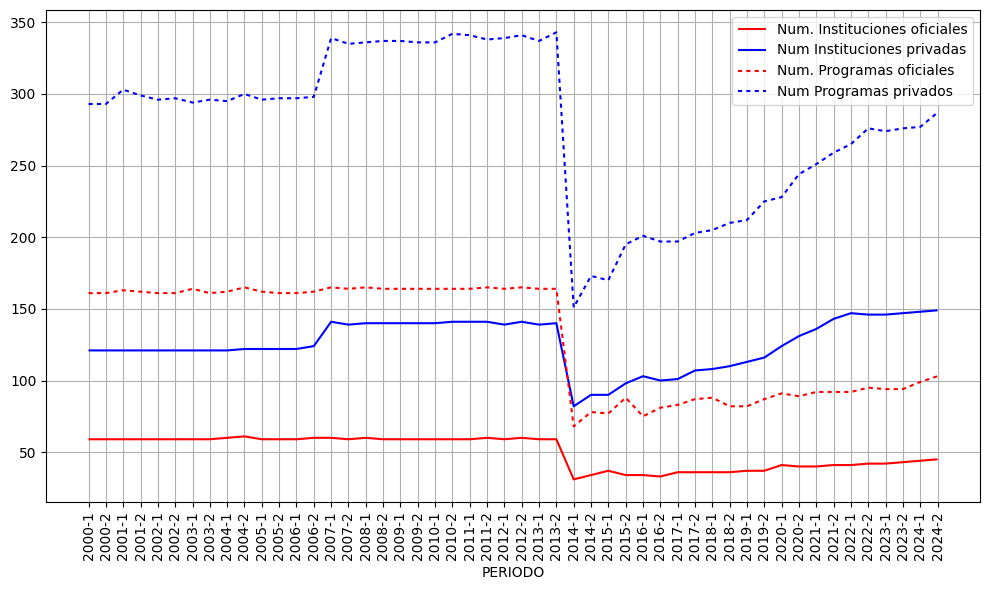

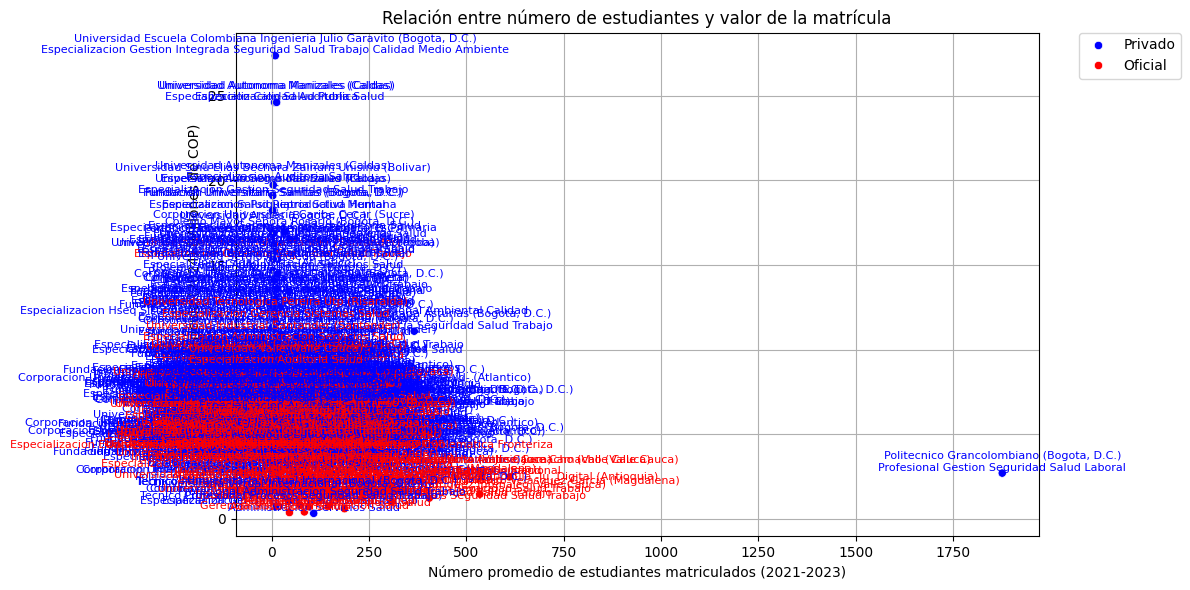

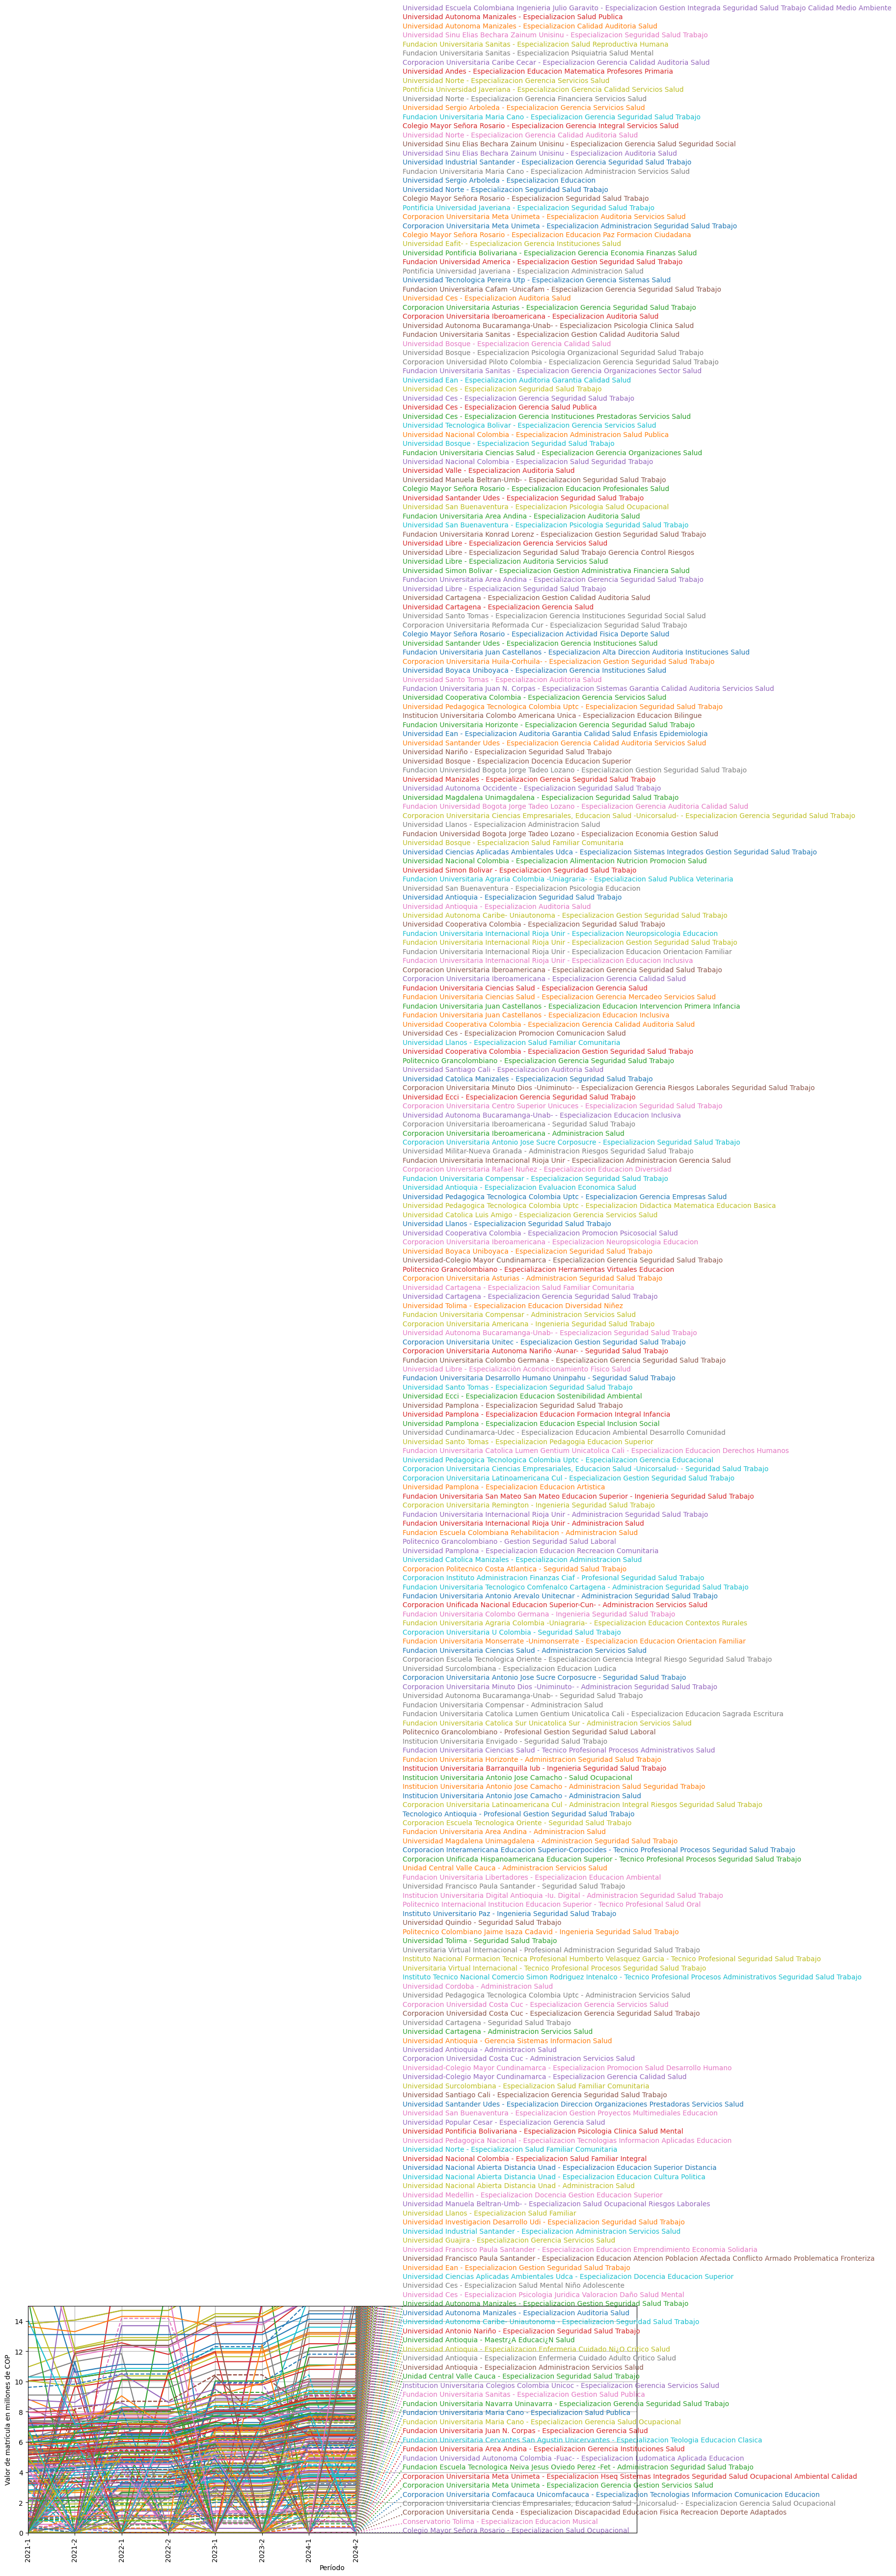

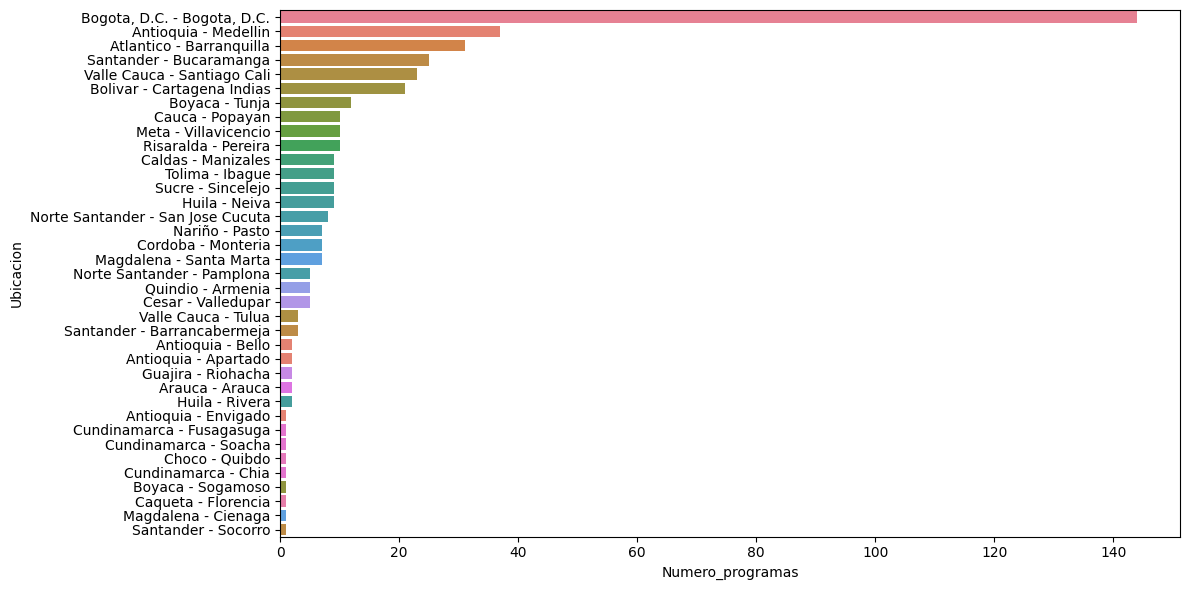

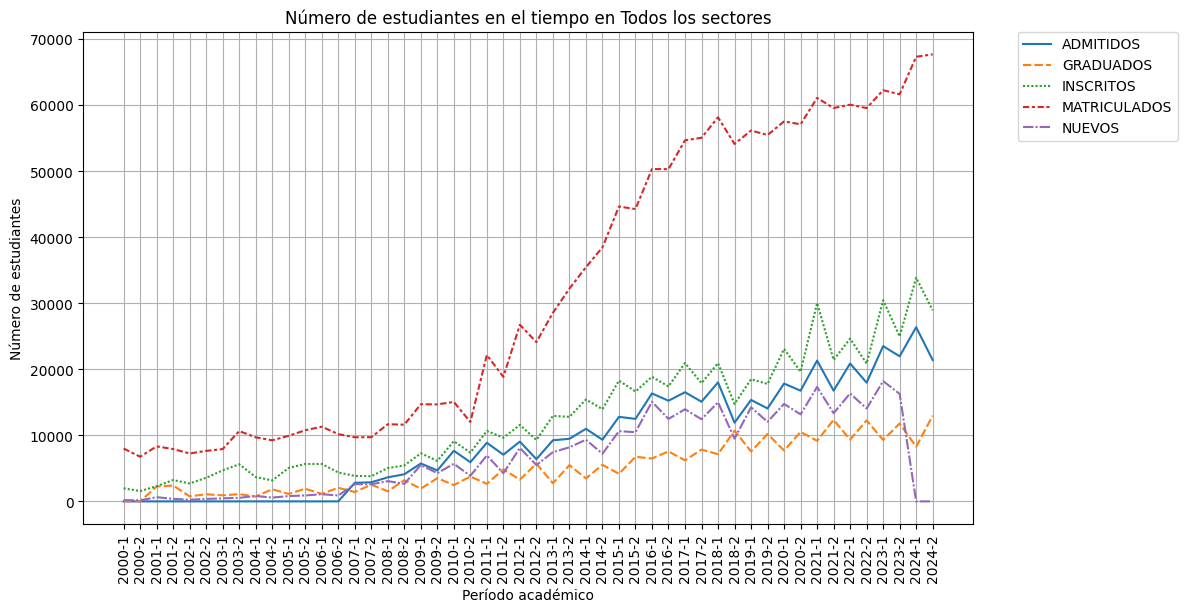

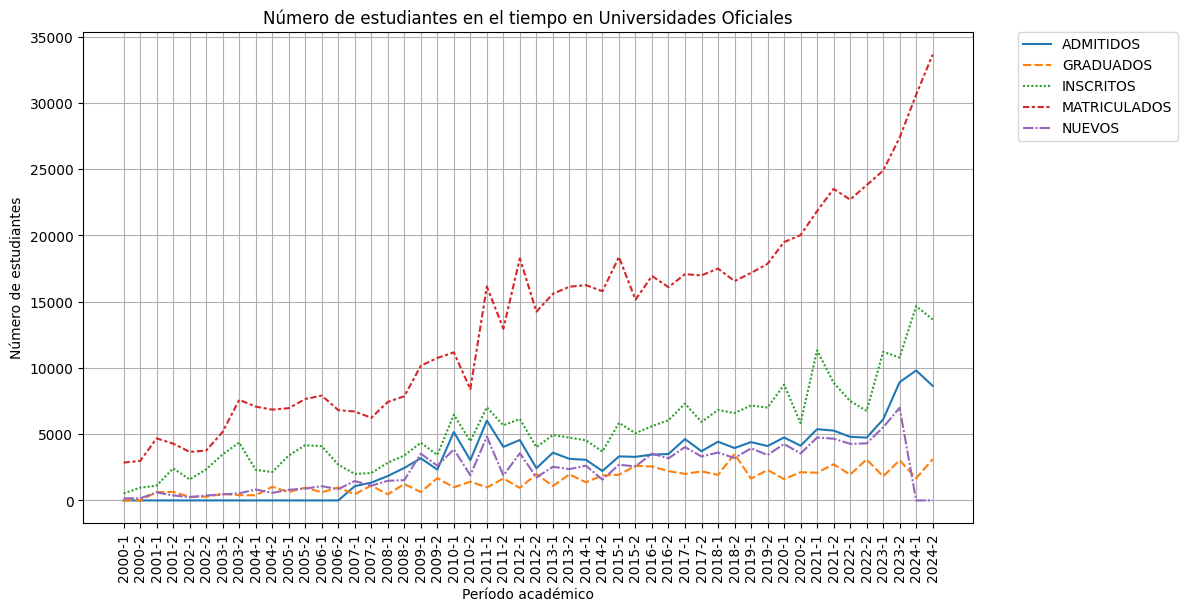

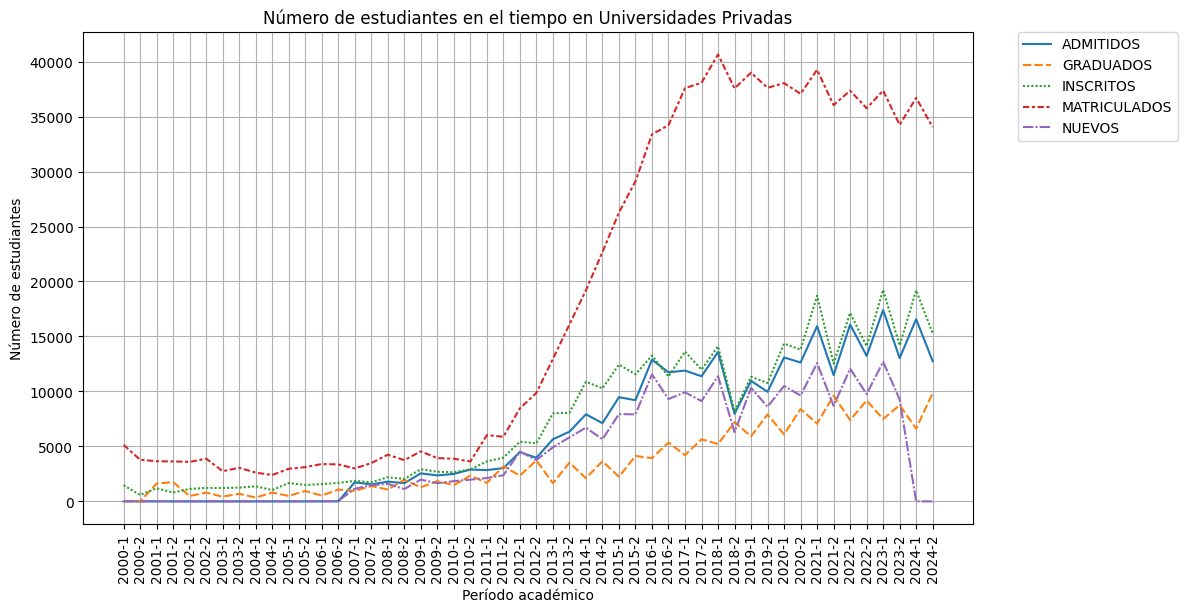

In [ ]:
estado_inicial = AgentState(
    nombre="Ingeniería en nanomateriales",
    nivel=Nivel.especializacion,
    descripcion="...",
    requerido='("especializacion" o "maestria") y ("educacion" o "formacion") y ("salud" o "medicina")',
    informacion_programas_nacionales=[],
    target_index=1
)
import os
if os.path.exists("./salida/final_state.json"):
    #Existe un estado previo, se debe verificar que corresponde al actual
    with open("./salida/final_state.json", "r", encoding="utf-8") as f:
        final_state_json = f.read()
        final_state = AgentState.model_validate_json(final_state_json)
        print(final_state.nombre, estado_inicial.nombre, final_state.nivel == estado_inicial.nivel, final_state.requerido == estado_inicial.requerido)
        if final_state.nombre == estado_inicial.nombre and final_state.nivel == estado_inicial.nivel and final_state.requerido == estado_inicial.requerido:
            print("El estado previo corresponde al estado inicial actual, se reutiliza la información.")
            estado_inicial = final_state
        else:
            print("El estado previo no corresponde al estado inicial actual, se ejecuta el grafo para obtener un nuevo estado.")
        
final_state = graph.invoke(estado_inicial)
final_state = AgentState.model_validate(final_state)

with open("salida/final_state.json", "w", encoding="utf-8") as f:
    f.write(final_state.model_dump_json(indent=4, ensure_ascii=False))